# Advent of Code 2018 - Day 7

I never know how others find these problems, but I thought this one was trickier than it looks. Oh boy, this is a mess, but it gets the job done. I'll clean it up and maybe even make it object-oriented if I get a chance.

In [ ]:
data = []
with open('inputs_day_7.txt', 'r') as f:
  for line in f:
    data.append(line.strip())

data[:5]

['Step F must be finished before step R can begin.',
 'Step I must be finished before step P can begin.',
 'Step C must be finished before step O can begin.',
 'Step H must be finished before step K can begin.',
 'Step Y must be finished before step N can begin.']

In [ ]:
# Parse
vertices = set()
edges = set()

to_directions = {}
from_directions = {}
for line in data:
  #print(line)
  a = line[line.find(' ') + 1]
  b = line[line.find('can') - 2]

  vertices.add(a)
  vertices.add(b)

  edges.add((a, b))

  if a in to_directions:
    to_directions[a] += [b]
  else:
    to_directions[a] = [b]

  if b in from_directions:
    from_directions[b] += [a]
  else:
    from_directions[b] = [a]

print('vertices:\n', vertices)
print('edges:\n', edges)

print('to_directions:\n', to_directions)
print('from_directions:\n', from_directions)

vertices:
 {'K', 'C', 'E', 'W', 'V', 'A', 'P', 'F', 'Z', 'M', 'I', 'G', 'X', 'D', 'Q', 'Y', 'U', 'H', 'R', 'J', 'L', 'S', 'T', 'N', 'B', 'O'}
edges:
 {('Q', 'V'), ('Z', 'U'), ('P', 'S'), ('G', 'K'), ('Z', 'S'), ('W', 'Q'), ('A', 'K'), ('V', 'U'), ('G', 'S'), ('T', 'W'), ('F', 'Y'), ('M', 'G'), ('M', 'A'), ('Q', 'Z'), ('V', 'Z'), ('F', 'D'), ('I', 'P'), ('D', 'O'), ('U', 'L'), ('Y', 'D'), ('X', 'S'), ('P', 'L'), ('T', 'E'), ('U', 'K'), ('P', 'E'), ('C', 'L'), ('Y', 'U'), ('T', 'J'), ('C', 'Z'), ('G', 'Z'), ('W', 'Z'), ('D', 'W'), ('R', 'L'), ('O', 'J'), ('X', 'U'), ('O', 'Z'), ('V', 'E'), ('I', 'C'), ('L', 'S'), ('N', 'Z'), ('N', 'E'), ('O', 'A'), ('B', 'Q'), ('A', 'S'), ('R', 'J'), ('Y', 'O'), ('J', 'U'), ('T', 'A'), ('Y', 'V'), ('F', 'R'), ('M', 'N'), ('D', 'A'), ('M', 'J'), ('Z', 'E'), ('O', 'N'), ('K', 'L'), ('P', 'U'), ('T', 'U'), ('X', 'Z'), ('Q', 'U'), ('J', 'K'), ('I', 'G'), ('U', 'E'), ('X', 'N'), ('A', 'U'), ('G', 'U'), ('Y', 'N'), ('M', 'Q'), ('B', 'N'), ('Q', 'L'), ('D', 'P'

## Part 1

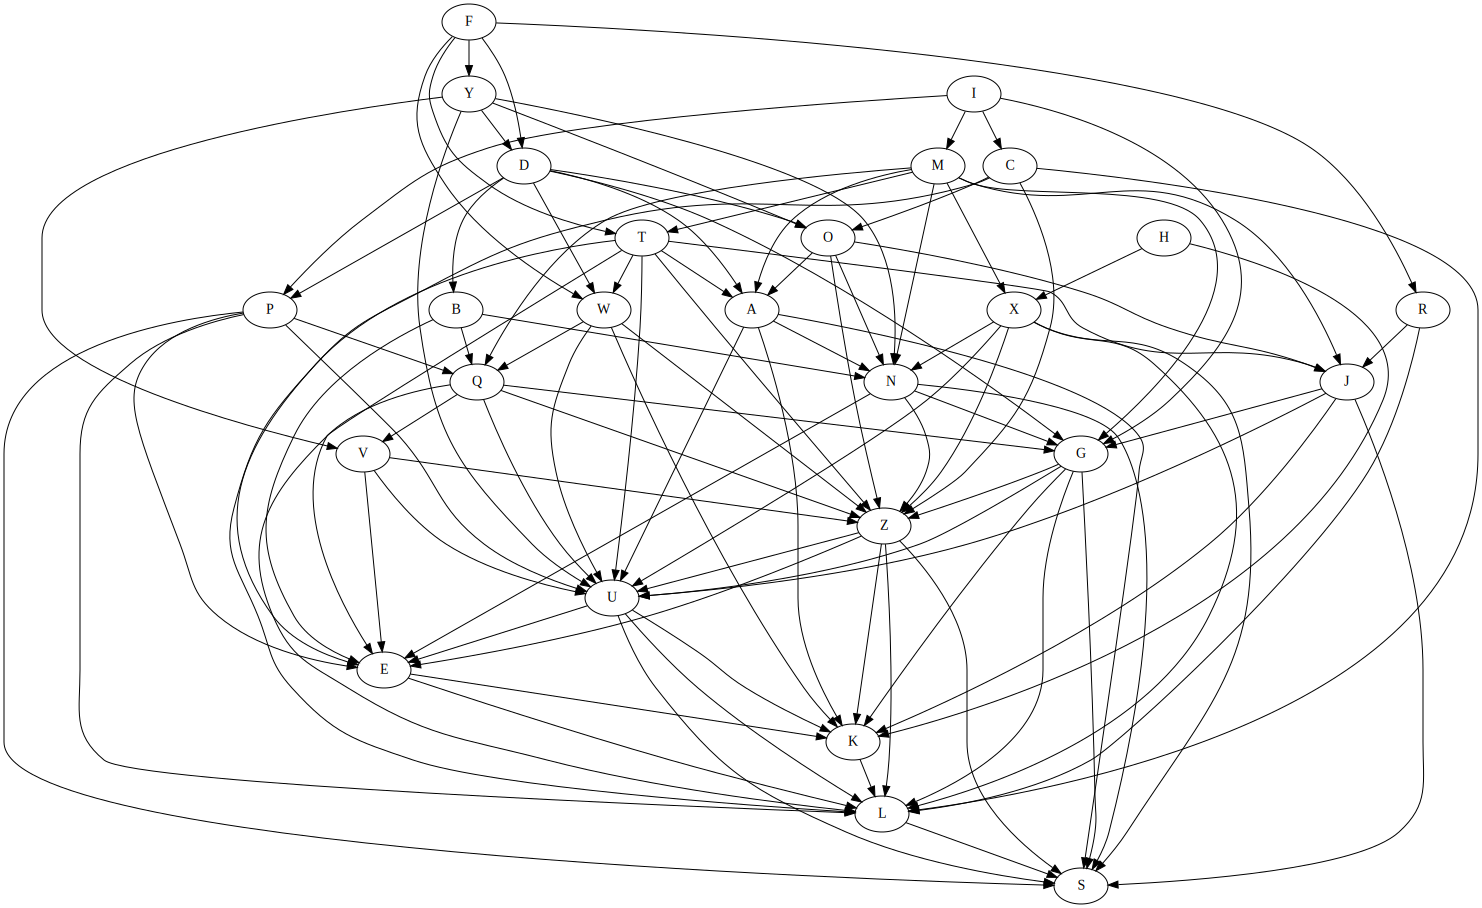

In [ ]:
from graphviz import Digraph

g = Digraph('G', filename='viz')

for a in to_directions:
  for b in to_directions[a]:
    g.edge(a, b)

g.view()
g

In [ ]:
# Need  data structure to hold all nodes
# and for each node keep a list of its requirements
# and whether those requirements have been satisifed
# and

nodes = {v:
         {'State' : 'Unavailable',
         'Required By': {}, 
          'Requires' : {}} for v in vertices}

for v in from_directions:
  nodes[v]['Required By'] = {x : False for x in from_directions[v]}
  nodes[v]['State'] = 'Unavailable'

for v in to_directions:
  nodes[v]['Requires'] = {x for x in to_directions[v]}

# Find a key that is not in the value (list) of any of the others
initials = []
for key in vertices:
  if not key in from_directions:
    initials.append(key)

for initial in initials:
  nodes[initial]['State'] = 'Available'

for n in nodes:
  print(n, nodes[n])

K {'State': 'Unavailable', 'Required By': {'H': False, 'A': False, 'Z': False, 'G': False, 'W': False, 'U': False, 'J': False, 'E': False}, 'Requires': {'L'}}
C {'State': 'Unavailable', 'Required By': {'I': False}, 'Requires': {'L', 'E', 'Z', 'O'}}
E {'State': 'Unavailable', 'Required By': {'T': False, 'Z': False, 'N': False, 'U': False, 'V': False, 'P': False, 'C': False, 'B': False}, 'Requires': {'L', 'K'}}
W {'State': 'Unavailable', 'Required By': {'D': False, 'T': False, 'F': False}, 'Requires': {'K', 'U', 'Q', 'Z'}}
V {'State': 'Unavailable', 'Required By': {'Q': False, 'Y': False}, 'Requires': {'U', 'E', 'Z'}}
A {'State': 'Unavailable', 'Required By': {'T': False, 'D': False, 'O': False, 'M': False}, 'Requires': {'N', 'K', 'U', 'S'}}
P {'State': 'Unavailable', 'Required By': {'I': False, 'D': False}, 'Requires': {'L', 'S', 'E', 'Q', 'U'}}
F {'State': 'Available', 'Required By': {}, 'Requires': {'R', 'Y', 'T', 'D', 'W'}}
Z {'State': 'Unavailable', 'Required By': {'T': False, 'Q': 

In [ ]:
while(True):
  available = sorted([x for x in nodes if nodes[x]['State'] == 'Available'])
  
  if len(available):
    print(available[0], end ='')
    # Mark as done
    to_do = available[0]
    nodes[to_do]['State'] = 'Done'

    # Find nodes that require it, and mark requirement as satisfied
    for n in nodes:
      if to_do in nodes[n]['Required By']:
        nodes[n]['Required By'][to_do] = True

        # Now recompute availability
        satisfied_count = 0
        for k in nodes[n]['Required By']:
          if nodes[n]['Required By'][k]:
            satisfied_count += 1

        if satisfied_count == len(nodes[n]['Required By']):
          nodes[n]['State'] = 'Available'

  else:
    break


FHICMRTXYDBOAJNPWQGVZUEKLS

## Part 2

This sounds like a scheduling problem in a multiprocessor setting. Perhaps I could find an algorithm.

In [ ]:
# Need  data structure to hold all nodes
# and for each node keep a list of its requirements
# and whether those requirements have been satisifed
# and

nodes = {v:
         {'State' : 'Unavailable',
         'Required By': {}, 
          'Requires' : {}} for v in vertices}

for v in from_directions:
  nodes[v]['Required By'] = {x : False for x in from_directions[v]}
  nodes[v]['State'] = 'Unavailable'

for v in to_directions:
  nodes[v]['Requires'] = {x for x in to_directions[v]}

# Find a key that is not in the value (list) of any of the others
initials = []
for key in vertices:
  if not key in from_directions:
    initials.append(key)

for initial in initials:
  nodes[initial]['State'] = 'Available'

for n in nodes:
  print(n, nodes[n])

K {'State': 'Unavailable', 'Required By': {'H': False, 'A': False, 'Z': False, 'G': False, 'W': False, 'U': False, 'J': False, 'E': False}, 'Requires': {'L'}}
C {'State': 'Unavailable', 'Required By': {'I': False}, 'Requires': {'L', 'E', 'Z', 'O'}}
E {'State': 'Unavailable', 'Required By': {'T': False, 'Z': False, 'N': False, 'U': False, 'V': False, 'P': False, 'C': False, 'B': False}, 'Requires': {'L', 'K'}}
W {'State': 'Unavailable', 'Required By': {'D': False, 'T': False, 'F': False}, 'Requires': {'K', 'U', 'Q', 'Z'}}
V {'State': 'Unavailable', 'Required By': {'Q': False, 'Y': False}, 'Requires': {'U', 'E', 'Z'}}
A {'State': 'Unavailable', 'Required By': {'T': False, 'D': False, 'O': False, 'M': False}, 'Requires': {'N', 'K', 'U', 'S'}}
P {'State': 'Unavailable', 'Required By': {'I': False, 'D': False}, 'Requires': {'L', 'S', 'E', 'Q', 'U'}}
F {'State': 'Available', 'Required By': {}, 'Requires': {'R', 'Y', 'T', 'D', 'W'}}
Z {'State': 'Unavailable', 'Required By': {'T': False, 'Q': 

In [ ]:
from string import ascii_uppercase
additional_times = ascii_uppercase
additional_times

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [ ]:
workers = {i : {'State' : 'Idle', 'Assignment' : None, 'Counter' : 0} for i in range(5)}
workers

{0: {'Assignment': None, 'Counter': 0, 'State': 'Idle'},
 1: {'Assignment': None, 'Counter': 0, 'State': 'Idle'},
 2: {'Assignment': None, 'Counter': 0, 'State': 'Idle'},
 3: {'Assignment': None, 'Counter': 0, 'State': 'Idle'},
 4: {'Assignment': None, 'Counter': 0, 'State': 'Idle'}}

In [ ]:
time_counter = 0
while(True):

  done_counter = sum([1 for n in nodes if nodes[n]['State'] == 'Done'])
  if done_counter == len(nodes):
    break

  time_counter += 1
  # First, decrement counter if an assignment is claimed, release if counter == 0
  for worker in workers:
    if workers[worker]['State'] == 'Busy':
      workers[worker]['Counter'] -= 1
      if workers[worker]['Counter'] == 0:
        workers[worker]['Counter'] = 0
        workers[worker]['State'] = 'Idle'
        assigned_step =  workers[worker]['Assignment']
        workers[worker]['Assignment'] = None
        nodes[assigned_step]['State'] = 'Done'


        # Find nodes that require the newly done step, and mark their requirement for this step as satisfied
        for n in nodes:
          if assigned_step in nodes[n]['Required By']:
            nodes[n]['Required By'][assigned_step] = True

            # Now recompute availability
            satisfied_count = 0
            for k in nodes[n]['Required By']:
              if nodes[n]['Required By'][k]:
                satisfied_count += 1

            if satisfied_count == len(nodes[n]['Required By']):
              nodes[n]['State'] = 'Available'


  # Next if new assignments need to be done
  available = sorted([x for x in nodes if nodes[x]['State'] == 'Available'])
  #print('available', available)

  available_workers = [x for x in workers if workers[x]['State'] == 'Idle']
  #print('available_workers', num_available_workers, available_workers)

  for step, worker in zip(available, available_workers): # zip returns an iterator of the same size as the shorter iterable
    counter = 60 + additional_times.index(step) + 1
    #print('step', step, 'requires', counter, 'seconds. To be assigned to worker', worker)

    # Assign to worker
    workers[worker]['Assignment'] = step
    workers[worker]['Counter'] = counter
    workers[worker]['State'] = 'Busy'

    # Mark the step as Claimed
    nodes[step]['State'] = 'Claimed'

time_counter - 1 # Off by one, no surprises given how messy this all is

946

In [ ]:
for n in nodes:
  print(n, nodes[n])

K {'State': 'Done', 'Required By': {'H': True, 'A': True, 'Z': True, 'G': True, 'W': True, 'U': True, 'J': True, 'E': True}, 'Requires': {'L'}}
C {'State': 'Done', 'Required By': {'I': True}, 'Requires': {'L', 'E', 'Z', 'O'}}
E {'State': 'Done', 'Required By': {'T': True, 'Z': True, 'N': True, 'U': True, 'V': True, 'P': True, 'C': True, 'B': True}, 'Requires': {'L', 'K'}}
W {'State': 'Done', 'Required By': {'D': True, 'T': True, 'F': True}, 'Requires': {'K', 'U', 'Q', 'Z'}}
V {'State': 'Done', 'Required By': {'Q': True, 'Y': True}, 'Requires': {'U', 'E', 'Z'}}
A {'State': 'Done', 'Required By': {'T': True, 'D': True, 'O': True, 'M': True}, 'Requires': {'N', 'K', 'U', 'S'}}
P {'State': 'Done', 'Required By': {'I': True, 'D': True}, 'Requires': {'L', 'S', 'E', 'Q', 'U'}}
F {'State': 'Done', 'Required By': {}, 'Requires': {'R', 'Y', 'T', 'D', 'W'}}
Z {'State': 'Done', 'Required By': {'T': True, 'Q': True, 'V': True, 'W': True, 'G': True, 'C': True, 'O': True, 'N': True, 'X': True}, 'Requi